# **Travaux Pratiques – Chaînes de Markov-HMMs - Victor LEDEZ**

<hr/>
<hr/>

In [1]:
import matplotlib.pyplot as plt
import numpy as np


<hr/>

## **Partie I**

<hr/>

In [2]:
# load : chargement d’un fichier

bigram_english = np.loadtxt('bigramenglish.txt')
print(bigram_english.shape)
print(bigram_english)


(28, 28)
[[0.0000000e+00 1.1268720e-01 4.3608943e-02 4.5454545e-02 3.2904451e-02
  2.2094495e-02 4.1763341e-02 1.5555790e-02 6.4437882e-02 6.8920059e-02
  3.6384729e-03 4.2185193e-03 2.3465514e-02 3.9759544e-02 2.2832736e-02
  7.0343809e-02 3.1058848e-02 1.4237503e-03 2.5680236e-02 6.6916262e-02
  1.6452225e-01 1.0388104e-02 7.0660198e-03 7.0502004e-02 1.0546298e-04
  1.0599030e-02 5.2731491e-05 0.0000000e+00]
 [0.0000000e+00 1.4701126e-05 2.2933757e-02 3.3959601e-02 3.8075917e-02
  1.4701126e-04 6.1744730e-03 2.4697892e-02 8.8206757e-04 3.7046838e-02
  8.8206757e-04 1.1907912e-02 8.1150216e-02 3.5870748e-02 2.2051689e-01
  1.4701126e-04 1.8082385e-02 1.4701126e-05 9.4822263e-02 9.5410308e-02
  1.3348623e-01 1.1760901e-02 3.3371556e-02 9.8497545e-03 5.8804504e-04
  1.9846520e-02 8.8206757e-04 6.7478169e-02]
 [0.0000000e+00 7.1874260e-02 7.8982703e-04 7.8982703e-05 7.8982703e-04
  2.8275808e-01 7.8982703e-05 7.8982703e-05 7.8982703e-05 7.0294605e-02
  7.8982703e-03 7.8982703e-05 1.20843

In [3]:
# Création du dictionnaire clé-valeur associant états et caractères :
letters = ' abcdefghijklmnopqrstuvwxyz '
dic = {i: letter for i, letter in enumerate(letters)}
print(dic)

# Inverser le dictionnaire(les valeurs deviennent les clés et réciproquement) :
dic_inv = {v: k for k, v in dic.items()}
print(dic_inv)


{0: ' ', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 27: ' '}
{' ': 27, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


### **I.2.a) Matrice de transitions**
> A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la dernière colonne ? Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.

In [4]:
# PREMIERE LIGNE DE LA MATRICE : La premiere ligne de la matrice de transition correspond a la probabilite de l'etat prochain pour le symbole ' '.

print(bigram_english[0])


[0.0000000e+00 1.1268720e-01 4.3608943e-02 4.5454545e-02 3.2904451e-02
 2.2094495e-02 4.1763341e-02 1.5555790e-02 6.4437882e-02 6.8920059e-02
 3.6384729e-03 4.2185193e-03 2.3465514e-02 3.9759544e-02 2.2832736e-02
 7.0343809e-02 3.1058848e-02 1.4237503e-03 2.5680236e-02 6.6916262e-02
 1.6452225e-01 1.0388104e-02 7.0660198e-03 7.0502004e-02 1.0546298e-04
 1.0599030e-02 5.2731491e-05 0.0000000e+00]


In [5]:
# DERNIERE COLONNE DE LA MATRICE : La derniere colonne de la matrice correspond a la probabilité d'obtenir ' ' en fonction de tous les symboles.

print(bigram_english[:, -1])


[0.0000000e+00 6.7478169e-02 7.1084433e-03 1.9535224e-02 5.9884373e-01
 3.6047379e-01 3.9653963e-01 3.1566736e-01 1.0300926e-01 2.4606608e-02
 9.5877277e-04 3.7225637e-01 1.5338255e-01 1.5795761e-01 2.9421872e-01
 1.2308174e-01 6.4222084e-02 1.3966480e-03 2.1088912e-01 4.3030156e-01
 2.2273059e-01 3.8466582e-02 9.9108028e-05 1.0216281e-01 1.2345679e-01
 7.7582944e-01 1.9193858e-03 1.0000000e+00]


In [6]:
for i, line in enumerate(bigram_english):
    letter = dic[i]
    best_transition = dic[np.argmax(line)]
    if letter != ' ':
        print(f'letter: {letter}, frequent transition: {best_transition}')


letter: a, frequent transition: n
letter: b, frequent transition: e
letter: c, frequent transition: o
letter: d, frequent transition:  
letter: e, frequent transition:  
letter: f, frequent transition:  
letter: g, frequent transition:  
letter: h, frequent transition: e
letter: i, frequent transition: n
letter: j, frequent transition: o
letter: k, frequent transition:  
letter: l, frequent transition: e
letter: m, frequent transition: e
letter: n, frequent transition:  
letter: o, frequent transition: n
letter: p, frequent transition: e
letter: q, frequent transition: u
letter: r, frequent transition: e
letter: s, frequent transition:  
letter: t, frequent transition: h
letter: u, frequent transition: r
letter: v, frequent transition: e
letter: w, frequent transition: a
letter: x, frequent transition: t
letter: y, frequent transition:  
letter: z, frequent transition: e


### **I.2.b) Générer un mot**
> On veut générer un mot à partir de l’état initial 1 (espace de début de mot). Ecrire une fonction etat_suivant qui génère un état (à t+1) à partir de l’état courant (à t) et à l’aide de la matrice de transitions et de la fonction de répartition. Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1. Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence d’états jusqu’à aboutir à l’état final (28). Ecrire une fonction display_seq qui transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire. Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés.

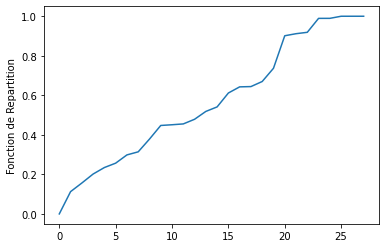

In [7]:
plt.plot(np.cumsum(bigram_english[0]))
plt.ylabel('Fonction de Repartition')
plt.show()

On utilise la fonction de repartition pour la generation de l'etat t_plus_1 puisqu'elle permet de generer un tirage aleatoire sur notre prochaine etat dependament des poids des probabilitees de la matrice de transition.

In [8]:
def etat_suivant(t):
    rand_prob = np.random.random()
    cum_sum = np.cumsum(t)
    t_plus_1 = 0

    while(rand_prob >= cum_sum[t_plus_1]):
        t_plus_1 = t_plus_1+1
    
    return t_plus_1

def genere_state_seq(transition_matrix):
    sequence = [0]
    i = 0
    while sequence[i] != (len(transition_matrix) - 1):
        sequence.append(etat_suivant(transition_matrix[sequence[i]]))
        i += 1
    return sequence

def display_seq(sequence, dictionary):
    seq_string = ''
    
    for word in sequence:
        seq_string += dictionary[word]

    return seq_string


In [9]:
n = 1
while n < 21:
    sequence = genere_state_seq(bigram_english)
    print(f'example {n}: {display_seq(sequence, dic)}')
    n += 1

example 1:  patise 
example 2:  armiver 
example 3:  asefan 
example 4:  andakne 
example 5:  cthatedee 
example 6:  the 
example 7:  ame 
example 8:  a 
example 9:  phandew 
example 10:  ashe 
example 11:  hthug 
example 12:  wha 
example 13:  maltre 
example 14:  mi 
example 15:  thare 
example 16:  ofusasthind 
example 17:  se 
example 18:  fog 
example 19:  iat 
example 20:  tercery 


### **I.2.c) Générer une phrase**
> On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29, correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence. Donner des exemples de phrases générées.

In [10]:
def modifie_mat_dic(dictionary, transition_matrix):
    size = len(transition_matrix)
    dictionary[size] = '.'
    
    transition_matrix[-1, -1] = 0
    transition_matrix = np.concatenate((transition_matrix, np.zeros((size, 1))), axis=1)
    transition_matrix[-1, -1] = 0.1
    transition_matrix[-1, 0] = 0.9
    transition_matrix = np.concatenate((transition_matrix, np.zeros((1, size+1))), axis=0)
    transition_matrix[-1, -1] = 1

    return dictionary, transition_matrix


In [11]:
dic_modified, bigram_english_modified = modifie_mat_dic(dic, bigram_english)

print(dic_modified)
print(bigram_english_modified[1])

{0: ' ', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 27: ' ', 28: '.'}
[0.0000000e+00 1.4701126e-05 2.2933757e-02 3.3959601e-02 3.8075917e-02
 1.4701126e-04 6.1744730e-03 2.4697892e-02 8.8206757e-04 3.7046838e-02
 8.8206757e-04 1.1907912e-02 8.1150216e-02 3.5870748e-02 2.2051689e-01
 1.4701126e-04 1.8082385e-02 1.4701126e-05 9.4822263e-02 9.5410308e-02
 1.3348623e-01 1.1760901e-02 3.3371556e-02 9.8497545e-03 5.8804504e-04
 1.9846520e-02 8.8206757e-04 6.7478169e-02 0.0000000e+00]


In [12]:
n = 1
while n < 21:
    sequence = genere_state_seq(bigram_english_modified)
    print(f'example {n}:{display_seq(sequence, dic_modified)}')
    n += 1


example 1: t  t .
example 2: chins  gn  tesivifrg  songisceen .
example 3: fald .
example 4: as  whioutod  bsag  yorviblefare  of  aies  chewso  paliglde  r  y  the  e  the  ilelass  isofon  the  reatus  lf .
example 5: thiorindielt  wan  de  an  as  apof  ivind .
example 6: icernan  t  cowo  thesund  chilind  t .
example 7: iofont  d .
example 8: wont  mearke  icoteelledyit  hen .
example 9: ans  it  in  the  ave  ft  hulinlld  llolmsuped  i  vi  ber  hauto  dowivito  fige  lditryedely  wheag  an  lore  ino  thed  bowhe  ttho .
example 10: wialy  d  mamuponisl  link  ind  wered  be .
example 11: pred  sicioras  edidithe  omir  banchee  cce  wha  t .
example 12: llind  tald  suf  ferouteequs  arais  banthithesh  hantheroorinde  re .
example 13: inge  t  me  her  by  ave  oany .
example 14: r .
example 15: mofe  meri  owee  agesthiowinghoucathighees  ofit  eig  angreand  ared  the  hed  ereve  mast  veepl  sot  hine  ather  t .
example 16: himeroeaichepre  caprercire  sin  ha  gastherar

### **I.3) Reconnaissance de la langue**
> Charger la matrice des transitions entre caractères pour le français. Ecrire une fonction calc_vraisemblance qui calcule la vraisemblance du modèle français pour une phrase donnée en multipliant les probabilités de transition. Pour tenir compte de toutes les transitions (notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra transformer une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , + et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase, respectivement. Calculer la vraisemblance des modèles français et anglais pour la phrase « to be or not to be ». De même calculer la vraisemblance des modèles français et anglais pour la phrase « etre ou ne pas etre ».

In [13]:
bigram_french = np.loadtxt('bigramfrancais.txt')
_, bigram_french_modified = modifie_mat_dic(dic, bigram_french)


In [14]:
def calc_vraisemblance(seq, transition_matrix):
    log_vraissemblance = 0

    for i in range(len(seq) - 1):
        t0 = seq[i]
        t1 = seq[i+1]
        log_vraissemblance -= np.log(transition_matrix[t0, t1])
    
    return log_vraissemblance

In [15]:
def sentence_to_sequence(sentence, dic_inv):
    sentence = sentence[:-1].split()
    sequence = []
    for word in sentence:
        sequence.append(0)
        for char in word:
            sequence.append(dic_inv[char])
        sequence.append(27)
    sequence.append(28)
    return sequence

In [16]:
phrase_test_1 = 'to be or not to be.'

sequence_1 = sentence_to_sequence(phrase_test_1, dic_inv)

vraisemblance = calc_vraisemblance(sequence_1, bigram_english_modified)
print(f'Vraisemblance pour la matrice de transition anglaise : {vraisemblance:.2f}')

vraisemblance = calc_vraisemblance(sequence_1, bigram_french_modified)
print(f'Vraisemblance pour la matrice de transition française : {vraisemblance:.2f}')


Vraisemblance pour la matrice de transition anglaise : 43.96
Vraisemblance pour la matrice de transition française : 67.29


In [17]:
phrase_test_2 = 'etre ou ne pas etre.'

sequence_2 = sentence_to_sequence(phrase_test_2, dic_inv)

vraisemblance = calc_vraisemblance(sequence_2, bigram_english_modified)
print(f'Vraisemblance pour la matrice de transition anglaise : {vraisemblance:.2f}')

vraisemblance = calc_vraisemblance(sequence_2, bigram_french_modified)
print(f'Vraisemblance pour la matrice de transition française : {vraisemblance:.2f}')


Vraisemblance pour la matrice de transition anglaise : 53.77
Vraisemblance pour la matrice de transition française : 43.61


<hr/>

## **Partie II**

<hr/>